In [14]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from IPython.display import Image

## 1) A primeira coisa que vamos fazer é ler o conjunto de dados usando a função read_csv() dos Pandas. 

In [20]:
zoo = pd.read_csv('zoo.csv' , sep = ',')
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## 2) Analise dos dados

In [3]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
print('\033[1;31m Valores Faltantes antes do tratamento dos dados: \033[0;0m', '\n',zoo.isna().sum(), '\n')

 Valores Faltantes antes do tratamento dos dados:  
 animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64 



In [5]:
print('\033[1;31m Valores Duplicados antes do tratamento dos dados:', '\n \033[0;0m', zoo[zoo.duplicated()], '\n')

 Valores Duplicados antes do tratamento dos dados: 
  Empty DataFrame
Columns: [animal_name, hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone, breathes, venomous, fins, legs, tail, domestic, catsize, class_type]
Index: [] 



In [6]:
zoo.drop(['animal_name'],axis=1,inplace=True)
zoo.head(15)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


## 2) Classificação usando KNN
#### a) Separar o conjunto em variavel resposta e variaveis de treinamento

In [7]:
X = zoo.iloc[:,0:-1].values
y = zoo.iloc[:,-1].values
print(X, "\n")
print(y)
X.shape

[[1 0 0 ... 0 0 1]
 [1 0 0 ... 1 0 1]
 [0 0 1 ... 1 0 0]
 ...
 [1 0 0 ... 1 0 1]
 [0 0 1 ... 0 0 0]
 [0 1 1 ... 1 0 0]] 

[1 1 4 1 1 1 1 4 4 1 1 2 4 7 7 7 2 1 4 1 2 2 1 2 6 5 5 1 1 1 6 1 1 2 4 1 1
 2 4 6 6 2 6 2 1 1 7 1 1 1 1 6 5 7 1 1 2 2 2 2 4 4 3 1 1 1 1 1 1 1 1 2 7 4
 1 1 3 7 2 2 3 7 4 2 1 7 4 2 6 5 3 3 4 1 1 2 1 6 1 7 2]


(101, 16)

#### b) Agora dividir em treino e teste (teste com 30%)

In [8]:
XNew = StandardScaler().fit_transform(X)
Xold = X
X = XNew


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)


Classif_KNN = KNeighborsClassifier(n_neighbors = 5)
Classif_KNN.fit(X_train, y_train)
y_pred = Classif_KNN.predict(X_test)

In [9]:
# # Avaliando o modelo
# analisando o rotulo real com o rotulo predito

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


print(classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       0.40      1.00      0.57         2
           7       1.00      0.50      0.67         6

    accuracy                           0.90        31
   macro avg       0.91      0.93      0.89        31
weighted avg       0.96      0.90      0.91        31

0.9032258064516129


In [10]:
# testa do K=1 até K=26 
k_range = range(1, 26)

In [11]:
# Lista todos as acurácias
scores = []

In [12]:
# Faz um loop de 1 a 26 armazena no dicionário scores

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.9032258064516129, 0.9032258064516129, 0.9032258064516129, 0.9032258064516129, 0.9032258064516129, 0.9032258064516129, 0.8709677419354839, 0.8387096774193549, 0.8387096774193549, 0.8064516129032258, 0.8064516129032258, 0.8064516129032258, 0.7741935483870968, 0.7419354838709677, 0.7419354838709677, 0.7419354838709677, 0.7419354838709677, 0.7419354838709677, 0.7096774193548387, 0.6774193548387096, 0.6774193548387096, 0.6774193548387096, 0.6774193548387096, 0.6774193548387096, 0.6774193548387096]


Text(0, 0.5, 'Testing Accuracy')

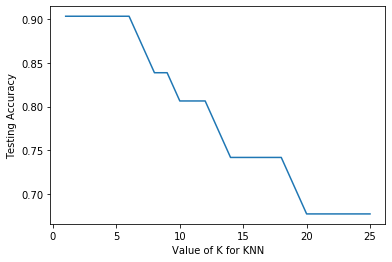

In [13]:
#Plota os valores de acc. em função do valor escolhido de K

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### Após normalizar o dataset observamos o melhor valor de K neighboorhood está no intervalo de 1 a 5. Obtemos 90.32% de acurácia em todos os valores dentro deste intervalo. Observamos que todas as classes do target tiveram precisão de 100%, exceto a classe 6 que teve uma baixa precisão de apenas 40%.